# Capstone project EDA

### By Victor Ramirez

In [1]:
# Import the libraries we'll use below.

# standard
import pandas as pd
import numpy as np
import random
import os

# tf and keras
import math
import tensorflow as tf
from sklearn import preprocessing
from tensorflow import keras
from keras import models
from keras import layers

# plots
import seaborn as sns  # for nicer plots
import matplotlib.pyplot as plt

sns.set(style="darkgrid")  # default style
import plotly.express as px

from scipy import stats # For in-built method to get PCC

# geo plots
import geopandas as gpd

random.seed(2)
%matplotlib inline

## Understanding the data

Before doing any training (or evaluating), let's make sure we understand what we're working with. 

### Load the data

We'll only use a few of the columns.

In [2]:
# Load the data from a CSV file into a pandas dataframe. Remember that each row
# is an example and each column in a feature.

df_traffic_collisions = pd.read_csv(
    'F:/code/uc berkeley/mids-210/datasciw210/EDA/data/toronto/Traffic Collisions - 4326.csv'
    # '/Users/RamirezV/Documents/GitHub/uc berkeley/210/datasciw210/EDA/Police_Department_Incident_Reports__2018_to_Present.csv'
)

df_major_crime = pd.read_csv(
    'F:/code/uc berkeley/mids-210/datasciw210/EDA/data/toronto/major-crime-indicators.csv'
)

df_motor_vechicle_collisions = pd.read_csv(
    'F:/code/uc berkeley/mids-210/datasciw210/EDA/data/toronto/Motor Vehicle Collisions with KSI Data - 4326.csv'
)

df_neighbourhood_crime = pd.read_csv(
    'F:/code/uc berkeley/mids-210/datasciw210/EDA/data/toronto/neighbourhood-crime-rates - 4326.csv'
)

df_homicides_1 = pd.read_csv(
    'F:/code/uc berkeley/mids-210/datasciw210/EDA/data/toronto/homicide - 4326.csv'
)

df_homicides_2 = pd.read_csv(
    'F:/code/uc berkeley/mids-210/datasciw210/EDA/data/toronto/Homicide - 4326.csv'
)

df_reported_crimes = pd.read_csv(
    'F:/code/uc berkeley/mids-210/datasciw210/EDA/data/toronto/Reported Crimes.csv'
)

df_victims_of_crime = pd.read_csv(
    'F:/code/uc berkeley/mids-210/datasciw210/EDA/data/toronto/Victims of Crime.csv'
)


## Read data

In [3]:
# dataset types

print("df_traffic_collisions.dtypes")
print(df_traffic_collisions.dtypes)


df_traffic_collisions.dtypes
_id                    int64
EventUniqueId         object
OccurrenceDate        object
Month                 object
Day_of_Week           object
Year                   int64
Hour                 float64
Division              object
Atom                  object
neighbourhood         object
Fatalities           float64
Injury_Collisions     object
FTR_Collisions        object
PD_Collisions         object
geometry              object
dtype: object


In [4]:

print("df_major_crime.dtypes")
print(df_major_crime.dtypes)


df_major_crime.dtypes
_id                      int64
event_unique_id         object
Division                object
occurrencedate          object
reporteddate            object
location_type           object
premises_type           object
ucr_code                 int64
ucr_ext                  int64
offence                 object
reportedyear             int64
reportedmonth           object
reportedday              int64
reporteddayofyear        int64
reporteddayofweek       object
reportedhour           float64
occurrenceyear         float64
occurrencemonth         object
occurrenceday          float64
occurrencedayofyear    float64
occurrencedayofweek     object
occurrencehour         float64
mci_category            object
Hood_ID                 object
Neighbourhood           object
dtype: object


In [5]:

print("df_motor_vechicle_collisions")
print(df_motor_vechicle_collisions.dtypes)


df_motor_vechicle_collisions
_id                    int64
ACCNUM                 int64
YEAR                   int64
DATE                  object
TIME                   int64
STREET1               object
STREET2               object
OFFSET                object
ROAD_CLASS            object
DISTRICT              object
WARDNUM              float64
LOCCOORD              object
ACCLOC                object
TRAFFCTL              object
VISIBILITY            object
LIGHT                 object
RDSFCOND              object
ACCLASS               object
IMPACTYPE             object
INVTYPE               object
INVAGE                object
INJURY                object
FATAL_NO              object
INITDIR               object
VEHTYPE               object
MANOEUVER             object
DRIVACT               object
DRIVCOND              object
PEDTYPE               object
PEDACT                object
PEDCOND               object
CYCLISTYPE            object
CYCACT                object
CYCCOND       

In [6]:
df_motor_vechicle_collisions

,_id,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,geometry
0,1,893184,2006,2006-01-01,236,WOODBINE AVE,O CONNOR DR,None,Major Arterial,Toronto and East York,...,Yes,None,Yes,None,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,"{'type': 'Point', 'coordinates': (-79.318797, ..."
1,2,893184,2006,2006-01-01,236,WOODBINE AVE,O CONNOR DR,None,Major Arterial,Toronto and East York,...,Yes,None,Yes,None,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,"{'type': 'Point', 'coordinates': (-79.318797, ..."
2,3,913296,2006,2006-06-25,2040,29 BLAIR ATHOL Cres,None,None,Local,Etobicoke York,...,None,None,None,None,10,Princess-Rosethorn,10,Princess-Rosethorn (10),D22,"{'type': 'Point', 'coordinates': (-79.54469, 4..."
3,4,893184,2006,2006-01-01,236,WOODBINE AVE,O CONNOR DR,None,Major Arterial,Toronto and East York,...,Yes,None,Yes,None,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,"{'type': 'Point', 'coordinates': (-79.318797, ..."
4,5,893184,2006,2006-01-01,236,WOODBINE AVE,O CONNOR DR,None,Major Arterial,Toronto and East York,...,Yes,None,Yes,None,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,"{'type': 'Point', 'coordinates': (-79.318797, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17483,17484,1001982074,2021,2021-10-15,1201,BURNHAMTHORPE RD,SHAVER AVE N,None,Major Arterial,Etobicoke York,...,Yes,None,None,None,158,Islington,14,Islington-City Centre West (14),D22,"{'type': 'Point', 'coordinates': (-79.551654, ..."
17484,17485,1001982074,2021,2021-10-15,1201,BURNHAMTHORPE RD,SHAVER AVE N,None,Major Arterial,Etobicoke York,...,Yes,None,None,None,158,Islington,14,Islington-City Centre West (14),D22,"{'type': 'Point', 'coordinates': (-79.551654, ..."
17485,17486,1001983260,2021,2021-10-15,1450,RICHMOND ST W,DUNCAN ST,None,Major Arterial,Toronto and East York,...,Yes,None,None,None,164,Wellington Place,77,Waterfront Communities-The Island (77),D52,"{'type': 'Point', 'coordinates': (-79.389316, ..."
17486,17487,1001983260,2021,2021-10-15,1450,RICHMOND ST W,DUNCAN ST,None,Major Arterial,Toronto and East York,...,Yes,None,None,None,164,Wellington Place,77,Waterfront Communities-The Island (77),D52,"{'type': 'Point', 'coordinates': (-79.389316, ..."


In [7]:

print("df_neighbourhood_crime")
print(df_neighbourhood_crime.dtypes)


df_neighbourhood_crime
_id                                 int64
OBJECTID                            int64
HoodName                           object
HoodID                              int64
F2021_Population_Projection         int64
                                   ...   
TheftfromMotorVehicle_Rate2018    float64
TheftfromMotorVehicle_Rate2019    float64
TheftfromMotorVehicle_Rate2020    float64
TheftfromMotorVehicle_Rate2021    float64
geometry                           object
Length: 134, dtype: object


In [8]:

print("df_homicides_1")
print(df_homicides_1.dtypes)


df_homicides_1
_id                 int64
Event_Unique_Id    object
Occurrence_year     int64
Division           object
Homicide_Type      object
Occurrence_Date    object
Hood_ID             int64
Neighbourhood      object
ObjectId            int64
geometry           object
dtype: object


In [9]:

print("df_homicides_2")
print(df_homicides_2.dtypes)


df_homicides_2
_id                 int64
Event_Unique_Id    object
Occurrence_year     int64
Division           object
Homicide_Type      object
Occurrence_Date    object
Hood_ID             int64
Neighbourhood      object
ObjectId            int64
geometry           object
dtype: object


In [10]:

print("df_reported_crimes")
print(df_reported_crimes.dtypes)


df_reported_crimes
_id              int64
ObjectId         int64
ReportedYear     int64
GeoDivision     object
Category        object
Subtype         object
Count_           int64
CountCleared     int64
dtype: object


In [11]:

print("df_victims_of_crime")
print(df_victims_of_crime.dtypes)


df_victims_of_crime
_id                int64
ReportedYear       int64
Category          object
Subtype           object
AssaultSubtype    object
Sex               object
AgeGroup          object
AgeCohort         object
Count_             int64
dtype: object


In [12]:
# data EDA

print("df_traffic_collisions")
print(df_traffic_collisions.describe())

print("df_major_crime")
print(df_major_crime.describe())

print("df_motor_vechicle_collisions")
print(df_motor_vechicle_collisions.describe())

print("df_neighbourhood_crime")
print(df_neighbourhood_crime.describe())

print("df_homicides_1")
print(df_homicides_1.describe())

print("df_homicides_2")
print(df_homicides_2.describe())

print("df_reported_crimes")
print(df_reported_crimes.describe())

print("df_victims_of_crime")
print(df_victims_of_crime.describe())

df_traffic_collisions
                 _id           Year           Hour  Fatalities
count  553780.000000  553780.000000  547339.000000  499.000000
mean   276890.500000    2017.530443      13.624940    1.016032
std    159862.660373       2.313957       4.739395    0.154398
min         1.000000    2014.000000       1.000000    1.000000
25%    138445.750000    2016.000000      10.000000    1.000000
50%    276890.500000    2018.000000      14.000000    1.000000
75%    415335.250000    2019.000000      17.000000    1.000000
max    553780.000000    2022.000000      23.000000    3.000000
df_major_crime
                 _id       ucr_code        ucr_ext   reportedyear  \
count  301233.000000  301233.000000  301233.000000  301233.000000   
mean   150617.000000    1702.422928     146.565585    2017.876713   
std     86958.621157     326.260102      51.988967       2.436940   
min         1.000000    1410.000000     100.000000    2014.000000   
25%     75309.000000    1430.000000     100.000000 

In [13]:
# sf_data = sf_data.drop_duplicates()
# sf_data.head(5)

In [14]:

print("df_traffic_collisions")
print(df_traffic_collisions.count())

print("df_major_crime")
print(df_major_crime.count())

print("df_motor_vechicle_collisions")
print(df_motor_vechicle_collisions.count())

print("df_neighbourhood_crime")
print(df_neighbourhood_crime.count())

print("df_homicides_1")
print(df_homicides_1.count())

print("df_homicides_2")
print(df_homicides_2.count())

print("df_reported_crimes")
print(df_reported_crimes.count())

print("df_victims_of_crime")
print(df_victims_of_crime.count())


df_traffic_collisions
_id                  553780
EventUniqueId        553780
OccurrenceDate       553780
Month                553780
Day_of_Week          553780
Year                 553780
Hour                 547339
Division             553780
Atom                 553780
neighbourhood        553780
Fatalities              499
Injury_Collisions    553780
FTR_Collisions       553780
PD_Collisions        553780
geometry             553780
dtype: int64
df_major_crime
_id                    301233
event_unique_id        301233
Division               301233
occurrencedate         301233
reporteddate           301233
location_type          301233
premises_type          301233
ucr_code               301233
ucr_ext                301233
offence                301233
reportedyear           301233
reportedmonth          301233
reportedday            301233
reporteddayofyear      301233
reporteddayofweek      301233
reportedhour           290882
occurrenceyear         301133
occurrencemonth     

In [15]:
print(df_traffic_collisions.columns.tolist())

['_id', 'EventUniqueId', 'OccurrenceDate', 'Month', 'Day_of_Week', 'Year', 'Hour', 'Division', 'Atom', 'neighbourhood', 'Fatalities', 'Injury_Collisions', 'FTR_Collisions', 'PD_Collisions', 'geometry']


In [16]:
print(df_major_crime.columns.tolist())

['_id', 'event_unique_id', 'Division', 'occurrencedate', 'reporteddate', 'location_type', 'premises_type', 'ucr_code', 'ucr_ext', 'offence', 'reportedyear', 'reportedmonth', 'reportedday', 'reporteddayofyear', 'reporteddayofweek', 'reportedhour', 'occurrenceyear', 'occurrencemonth', 'occurrenceday', 'occurrencedayofyear', 'occurrencedayofweek', 'occurrencehour', 'mci_category', 'Hood_ID', 'Neighbourhood']


In [17]:
print(df_motor_vechicle_collisions.columns.tolist())

['_id', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION', 'geometry']


In [18]:
print(df_neighbourhood_crime.columns.tolist())

['_id', 'OBJECTID', 'HoodName', 'HoodID', 'F2021_Population_Projection', 'Assault_2014', 'Assault_2015', 'Assault_2016', 'Assault_2017', 'Assault_2018', 'Assault_2019', 'Assault_2020', 'Assault_2021', 'Assault_Rate2014', 'Assault_Rate2015', 'Assault_Rate2016', 'Assault_Rate2017', 'Assault_Rate2018', 'Assault_Rate2019', 'Assault_Rate2020', 'Assault_Rate2021', 'AutoTheft_2014', 'AutoTheft_2015', 'AutoTheft_2016', 'AutoTheft_2017', 'AutoTheft_2018', 'AutoTheft_2019', 'AutoTheft_2020', 'AutoTheft_2021', 'AutoTheft_Rate2014', 'AutoTheft_Rate2015', 'AutoTheft_Rate2016', 'AutoTheft_Rate2017', 'AutoTheft_Rate2018', 'AutoTheft_Rate2019', 'AutoTheft_Rate2020', 'AutoTheft_Rate2021', 'BreakAndEnter_2014', 'BreakAndEnter_2015', 'BreakAndEnter_2016', 'BreakAndEnter_2017', 'BreakAndEnter_2018', 'BreakAndEnter_2019', 'BreakAndEnter_2020', 'BreakAndEnter_2021', 'BreakAndEnter_Rate2014', 'BreakAndEnter_Rate2015', 'BreakAndEnter_Rate2016', 'BreakAndEnter_Rate2017', 'BreakAndEnter_Rate2018', 'BreakAndEnte

In [19]:
print(df_homicides_1.columns.tolist())

['_id', 'Event_Unique_Id', 'Occurrence_year', 'Division', 'Homicide_Type', 'Occurrence_Date', 'Hood_ID', 'Neighbourhood', 'ObjectId', 'geometry']


In [20]:
print(df_homicides_2.columns.tolist())

['_id', 'Event_Unique_Id', 'Occurrence_year', 'Division', 'Homicide_Type', 'Occurrence_Date', 'Hood_ID', 'Neighbourhood', 'ObjectId', 'geometry']


In [21]:
print(df_reported_crimes.columns.tolist())

['_id', 'ObjectId', 'ReportedYear', 'GeoDivision', 'Category', 'Subtype', 'Count_', 'CountCleared']


In [22]:
print(df_victims_of_crime.columns.tolist())

['_id', 'ReportedYear', 'Category', 'Subtype', 'AssaultSubtype', 'Sex', 'AgeGroup', 'AgeCohort', 'Count_']


## Traffic Collisions Visual EDA

In [23]:

nb = 'F:/code/uc berkeley/mids-210/datasciw210/EDA/data/toronto/Neighbourhoods.shp'
regions = gpd.read_file(nb)

regions.sample(5)

,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,geometry
134,135,2502232,26022747,NaN,49,49,Bayview Woods-Steeles,Bayview Woods-Steeles (49),Not an NIA or Emerging Neighbourhood,NaN,17826881,"POLYGON ((-79.36825 43.79091, -79.36807 43.790..."
117,118,2502249,26022764,NaN,35,35,Westminster-Branson,Westminster-Branson (35),Emerging Neighbourhood,EN,17826609,"POLYGON ((-79.44605 43.78592, -79.44555 43.783..."
132,133,2502234,26022749,NaN,52,52,Bayview Village,Bayview Village (52),Not an NIA or Emerging Neighbourhood,NaN,17826849,"POLYGON ((-79.38349 43.76408, -79.38715 43.763..."
66,67,2502300,26022815,NaN,90,90,Junction Area,Junction Area (90),Not an NIA or Emerging Neighbourhood,NaN,17825793,"POLYGON ((-79.47383 43.67938, -79.47345 43.679..."
63,64,2502303,26022818,NaN,94,94,Wychwood,Wychwood (94),Not an NIA or Emerging Neighbourhood,NaN,17825745,"POLYGON ((-79.41812 43.68271, -79.41781 43.681..."


In [24]:
regions['neighbourhood'] = regions['FIELD_7'].str.replace(' \(.+\)', '').str.lower()

C:\Users\Victor\AppData\Local\Temp/ipykernel_3256/854704626.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  regions['neighbourhood'] = regions['FIELD_7'].str.replace(' \(.+\)', '').str.lower()


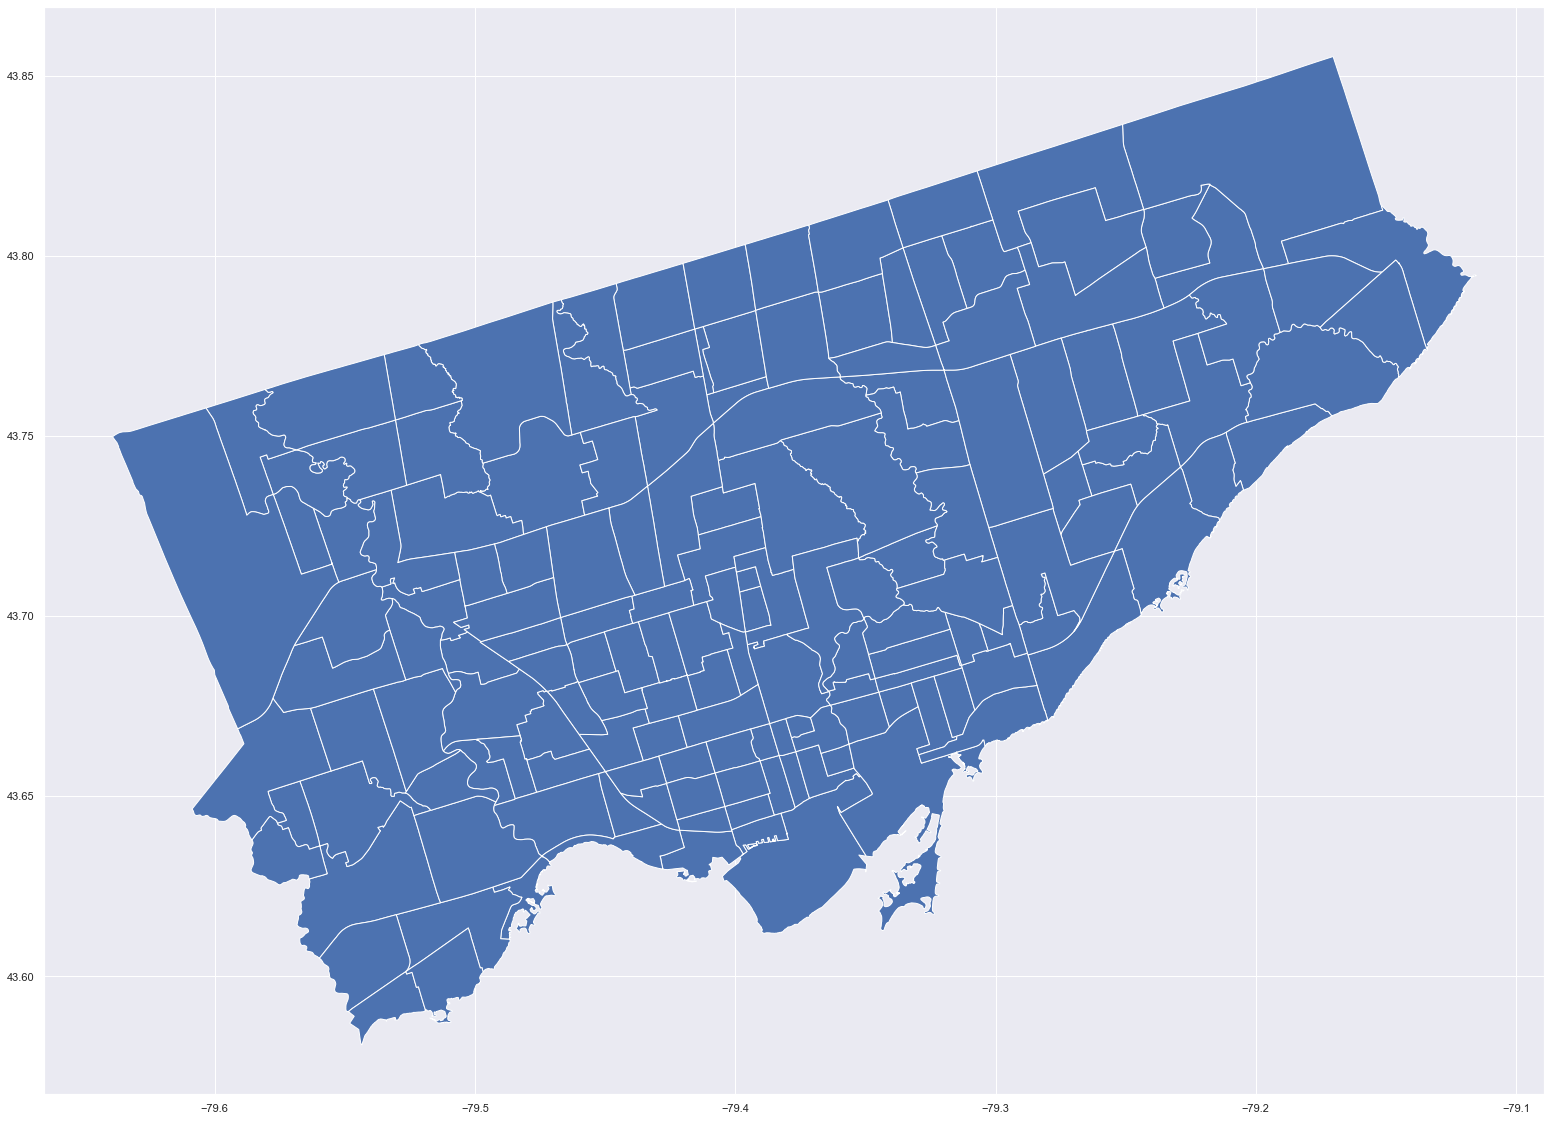

In [25]:
regions.plot(figsize=(40,20))
plt.show()

In [26]:
df_traffic_collisions['count'] = 1
dataByNeighbourhood = df_traffic_collisions.groupby('neighbourhood').count()[['count']].reset_index()
dataByNeighbourhood['neighbourhood'] = dataByNeighbourhood['neighbourhood'].str.lower()
dataByNeighbourhood.sort_values('count', ascending=False).head(10)


,neighbourhood,count
84,nsa,81721
123,waterfront communities-the island (77),18034
129,wexford/maryvale (119),12273
125,west humber-clairville (1),11925
133,woburn (137),10785
58,islington-city centre west (14),10624
6,bay street corridor (76),10424
139,york university heights (27),10236
4,banbury-don mills (42),8804
76,milliken (130),8522


In [31]:
merged = regions.set_index('neighbourhood').join(dataByNeighbourhood.set_index('neighbourhood'))
merged = merged.reset_index()
merged = merged.fillna(0)
merged[['neighbourhood', 'geometry', 'count']].sample(5)

,neighbourhood,geometry,count
151,thistletown-beaumond heights,"POLYGON ((-79.56226 43.74373, -79.56234 43.743...",0.0
0,south eglinton-davisville,"POLYGON ((-79.38635 43.69783, -79.38623 43.697...",0.0
68,clairlea-birchmount,"POLYGON ((-79.27603 43.72536, -79.27533 43.723...",0.0
48,bendale south,"POLYGON ((-79.24315 43.75578, -79.24300 43.755...",0.0
116,newtonbrook west,"POLYGON ((-79.44268 43.77389, -79.44301 43.773...",0.0


<AxesSubplot:>

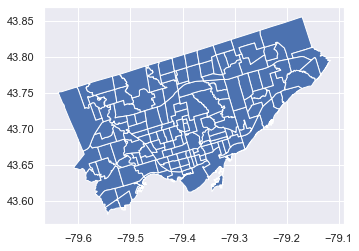

In [32]:
merged.plot()


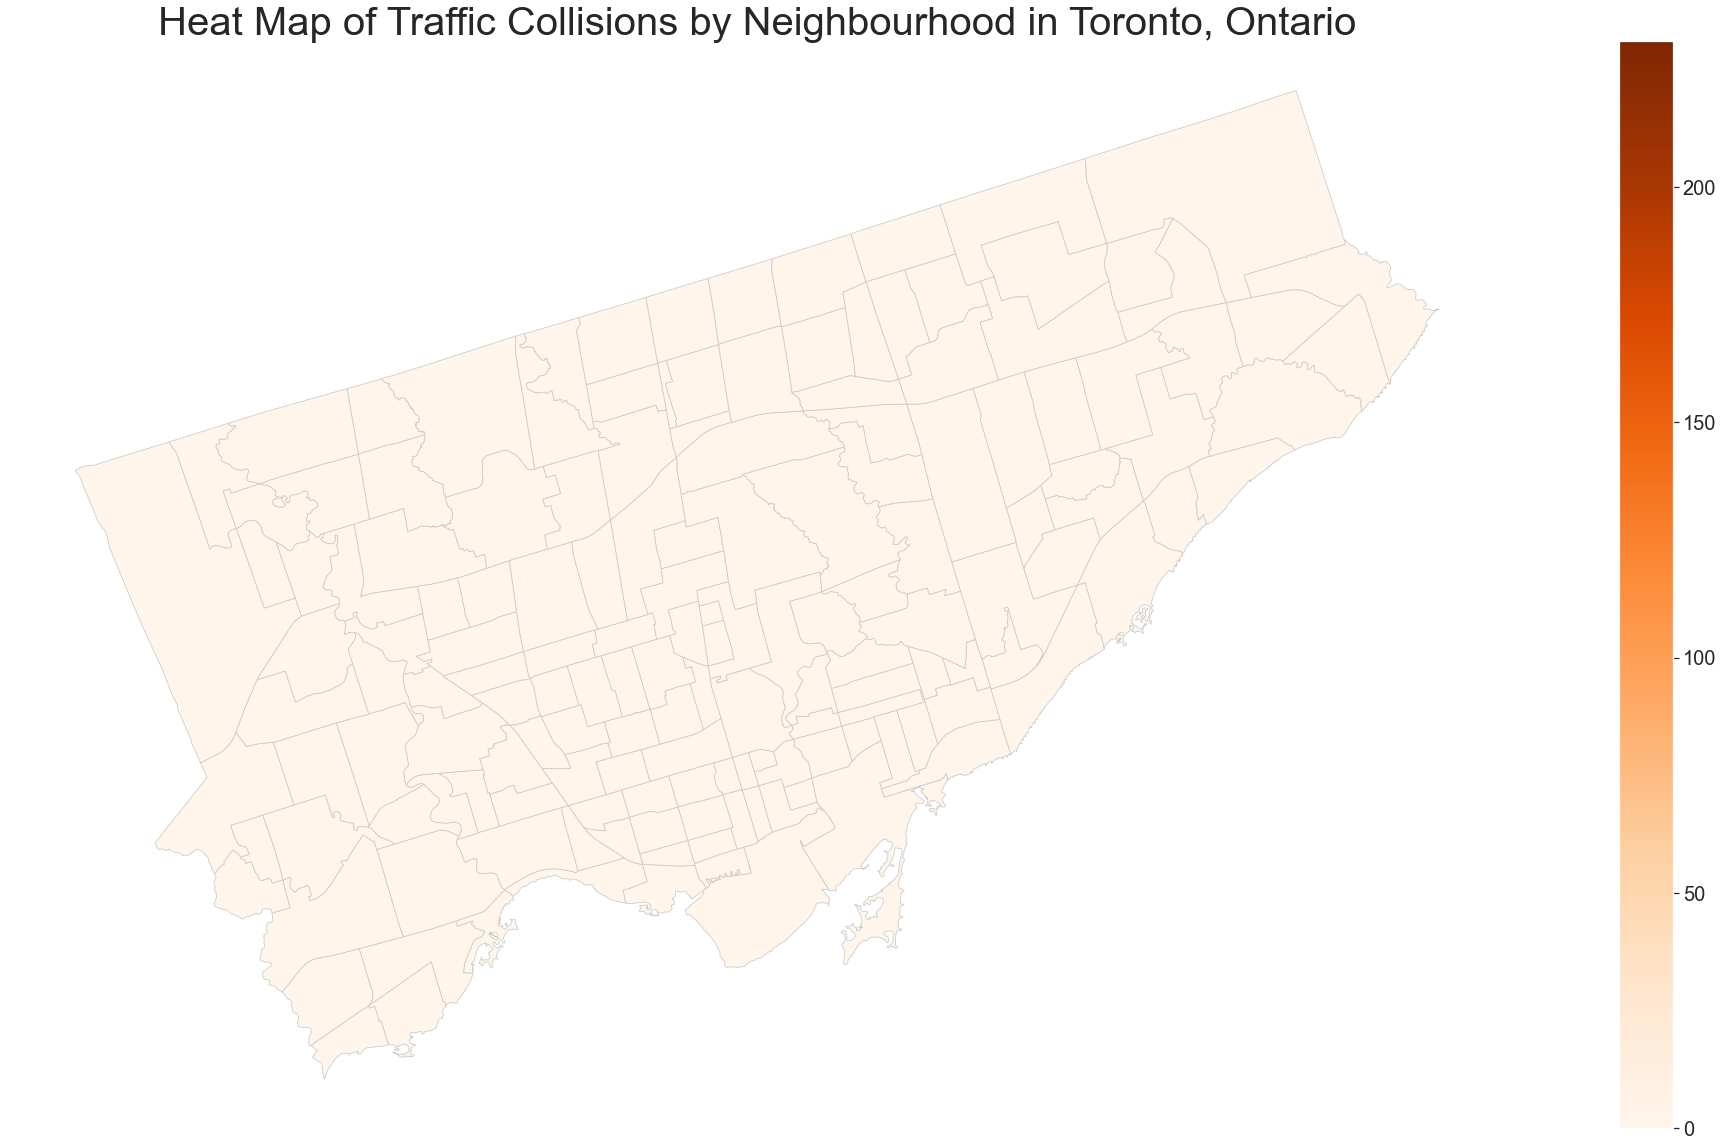

In [33]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Traffic Collisions by Neighbourhood in Toronto, Ontario', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'Oranges'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

merged.plot('count', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

for idx, row in merged.iterrows():
    if(row['count'] > 50):
        plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),
                 horizontalalignment='center', fontsize='large', color='black', wrap=True)
plt.show()


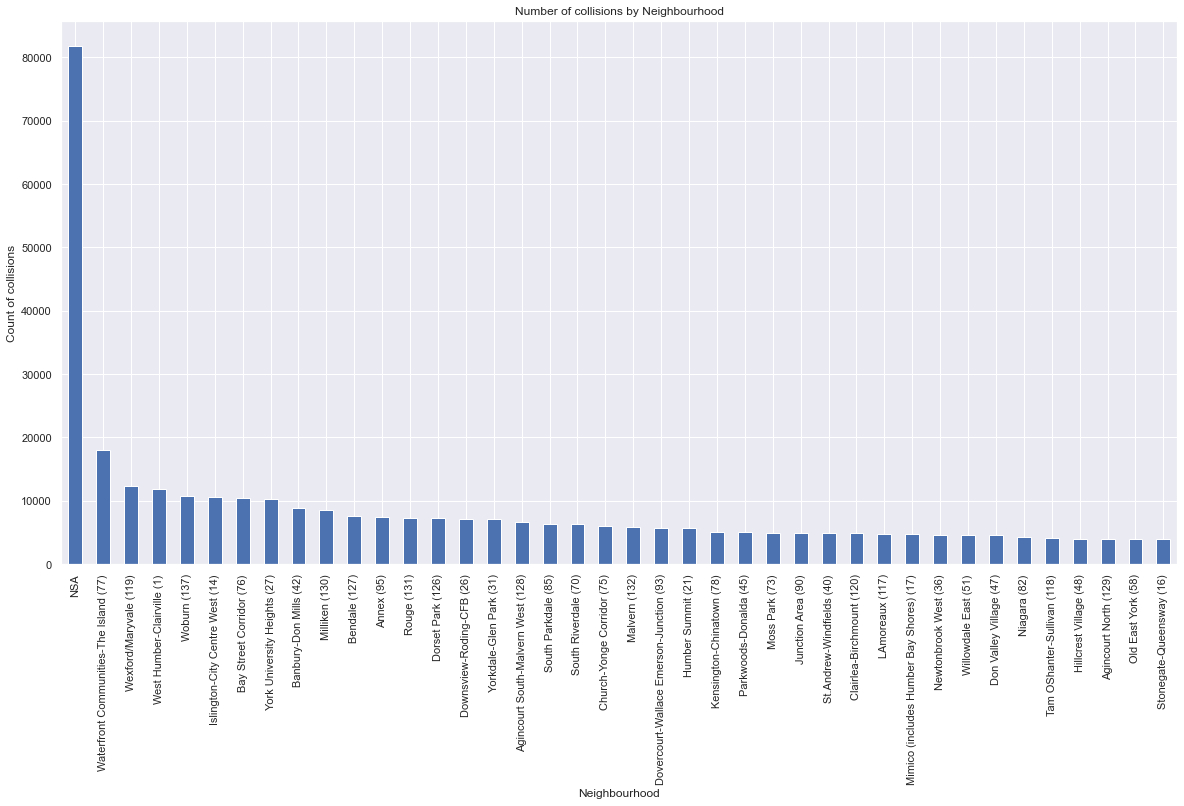

In [37]:
df_traffic_collisions.neighbourhood.value_counts().nlargest(40).plot(kind='bar', figsize=(20,10))
plt.title("Number of collisions by Neighbourhood")
plt.ylabel('Count of collisions')
plt.xlabel('Neighbourhood');

<AxesSubplot:>

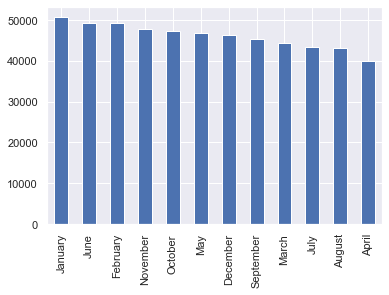

In [38]:
crashes_by_month = df_traffic_collisions['Month'].value_counts()
crashes_by_month.plot(kind='bar')

<AxesSubplot:>

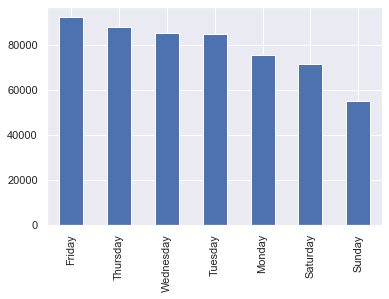

In [39]:
crashes_by_day = df_traffic_collisions['Day_of_Week'].value_counts()
crashes_by_day.plot(kind='bar')

<AxesSubplot:>

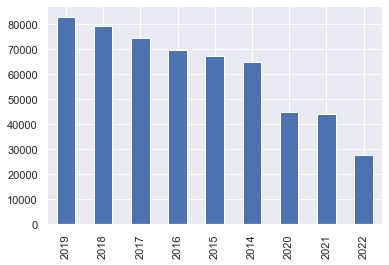

In [40]:
crashes_by_year = df_traffic_collisions['Year'].value_counts()
crashes_by_year.plot(kind='bar')

,_id,Year,Hour,Fatalities,count
_id,1.000000,0.988754,-0.022220,0.067263,NaN
Year,0.988754,1.000000,-0.023328,0.074237,NaN
Hour,-0.022220,-0.023328,1.000000,0.003779,NaN
Fatalities,0.067263,0.074237,0.003779,1.000000,NaN
count,NaN,NaN,NaN,NaN,NaN


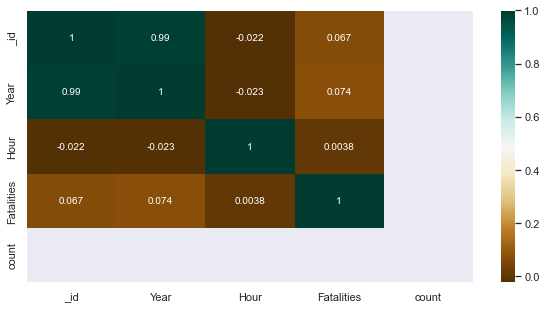

In [41]:
plt.figure(figsize=(10,5))
c= df_traffic_collisions.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

## Major Crime Visual EDA

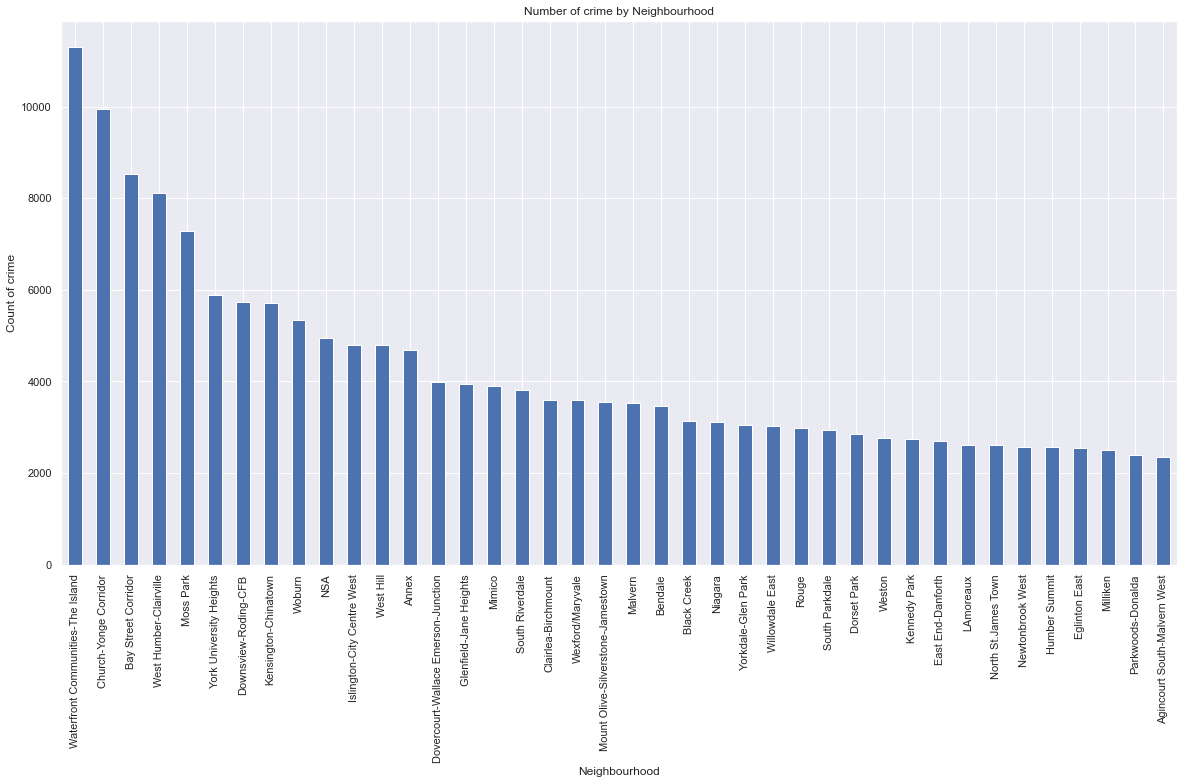

In [42]:
df_major_crime.Neighbourhood.value_counts().nlargest(40).plot(kind='bar', figsize=(20,10))
plt.title("Number of crime by Neighbourhood")
plt.ylabel('Count of crime')
plt.xlabel('Neighbourhood');

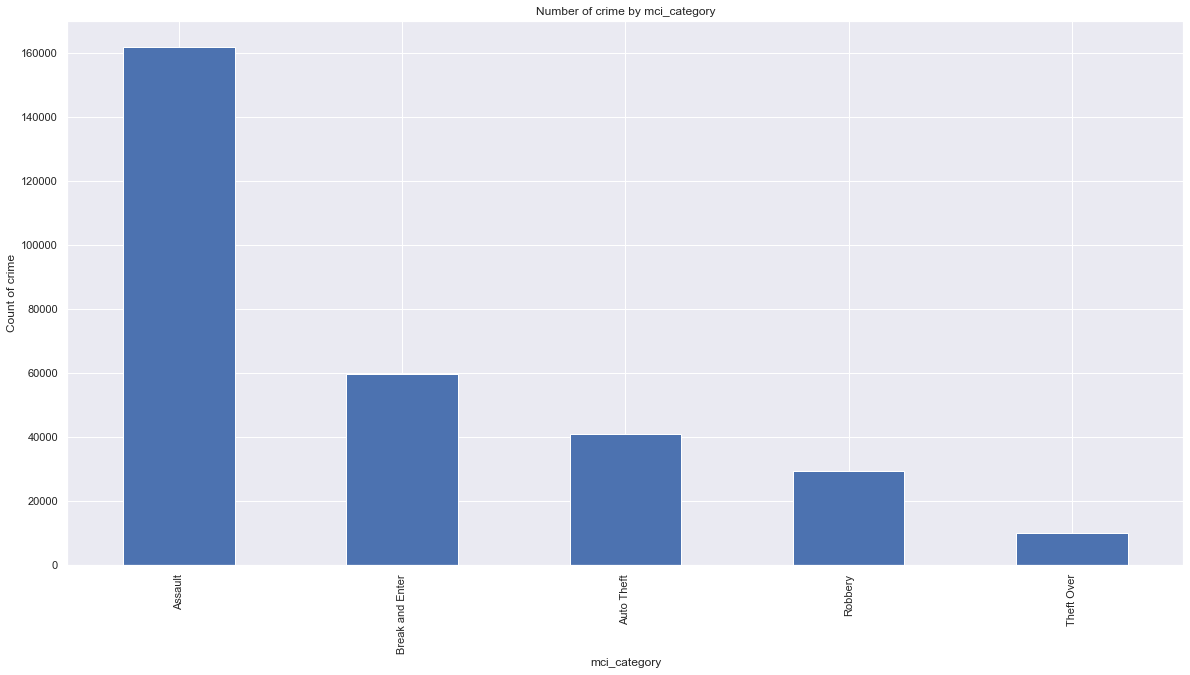

In [43]:
df_major_crime.mci_category.value_counts().nlargest(40).plot(kind='bar', figsize=(20,10))
plt.title("Number of crime by mci_category")
plt.ylabel('Count of crime')
plt.xlabel('mci_category');

,_id,ucr_code,ucr_ext,reportedyear,reportedday,reporteddayofyear,reportedhour,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour
_id,1.000000,0.035639,0.019129,0.992870,0.010255,0.016790,-0.019069,0.970288,0.000850,0.015501,0.012416
ucr_code,0.035639,1.000000,0.920490,0.034324,-0.000665,0.002388,-0.105878,0.043597,0.011813,0.008028,-0.040249
ucr_ext,0.019129,0.920490,1.000000,0.018135,-0.001486,0.001659,-0.085448,0.028780,0.013022,0.006953,-0.021614
reportedyear,0.992870,0.034324,0.018135,1.000000,0.000092,-0.099195,-0.018468,0.976381,-0.007648,-0.092903,0.011691
reportedday,0.010255,-0.000665,-0.001486,0.000092,1.000000,0.088158,-0.002034,0.001967,0.819343,0.073486,-0.001643
reporteddayofyear,0.016790,0.002388,0.001659,-0.099195,0.088158,1.000000,-0.004615,-0.088892,0.074634,0.934273,0.003875
reportedhour,-0.019069,-0.105878,-0.085448,-0.018468,-0.002034,-0.004615,1.000000,-0.021288,-0.005807,-0.004788,0.618455
occurrenceyear,0.970288,0.043597,0.028780,0.976381,0.001967,-0.088892,-0.021288,1.000000,0.011440,-0.088513,0.011995
occurrenceday,0.000850,0.011813,0.013022,-0.007648,0.819343,0.074634,-0.005807,0.011440,1.000000,0.099313,0.002148
occurrencedayofyear,0.015501,0.008028,0.006953,-0.092903,0.073486,0.934273,-0.004788,-0.088513,0.099313,1.000000,0.004450


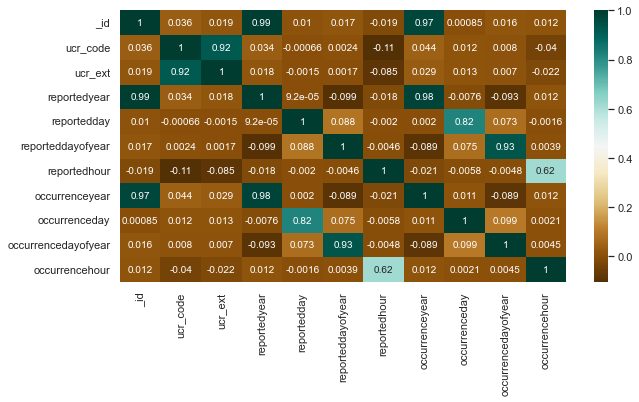

In [44]:
plt.figure(figsize=(10,5))
c= df_major_crime.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

## Motor Vehicle Collisions Visual EDA

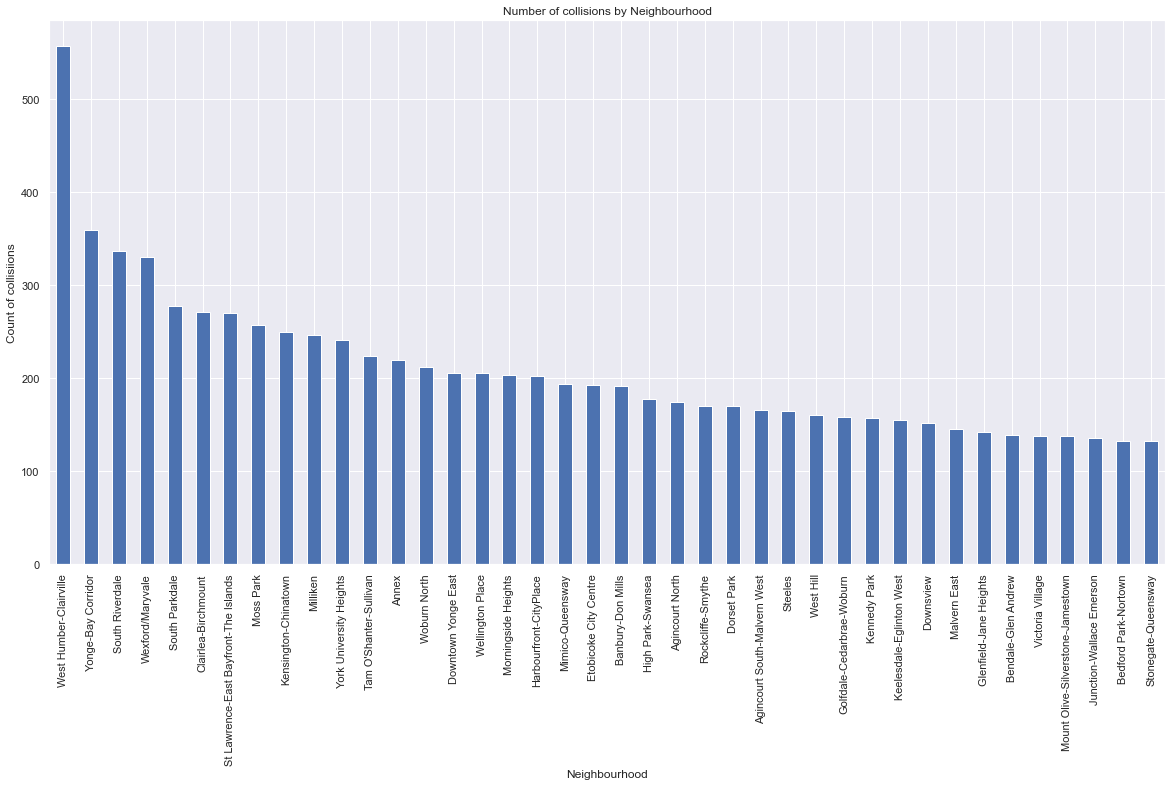

In [45]:
df_motor_vechicle_collisions.NEIGHBOURHOOD_158.value_counts().nlargest(40).plot(kind='bar', figsize=(20,10))
plt.title("Number of collisions by Neighbourhood")
plt.ylabel('Count of collisiions')
plt.xlabel('Neighbourhood');

,_id,ACCNUM,YEAR,TIME,WARDNUM
_id,1.000000,0.687832,0.991528,0.045215,0.008572
ACCNUM,0.687832,1.000000,0.688331,0.017341,0.012911
YEAR,0.991528,0.688331,1.000000,0.045411,0.009227
TIME,0.045215,0.017341,0.045411,1.000000,-0.000579
WARDNUM,0.008572,0.012911,0.009227,-0.000579,1.000000


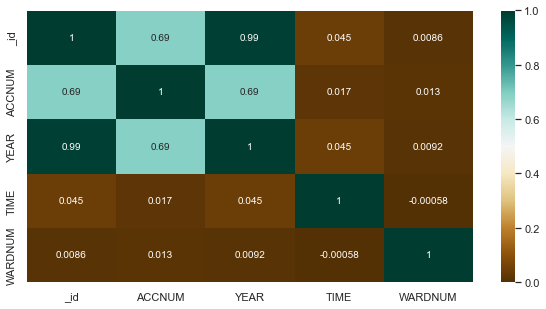

In [46]:
plt.figure(figsize=(10,5))
c= df_motor_vechicle_collisions.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

## Homicides Visual EDA

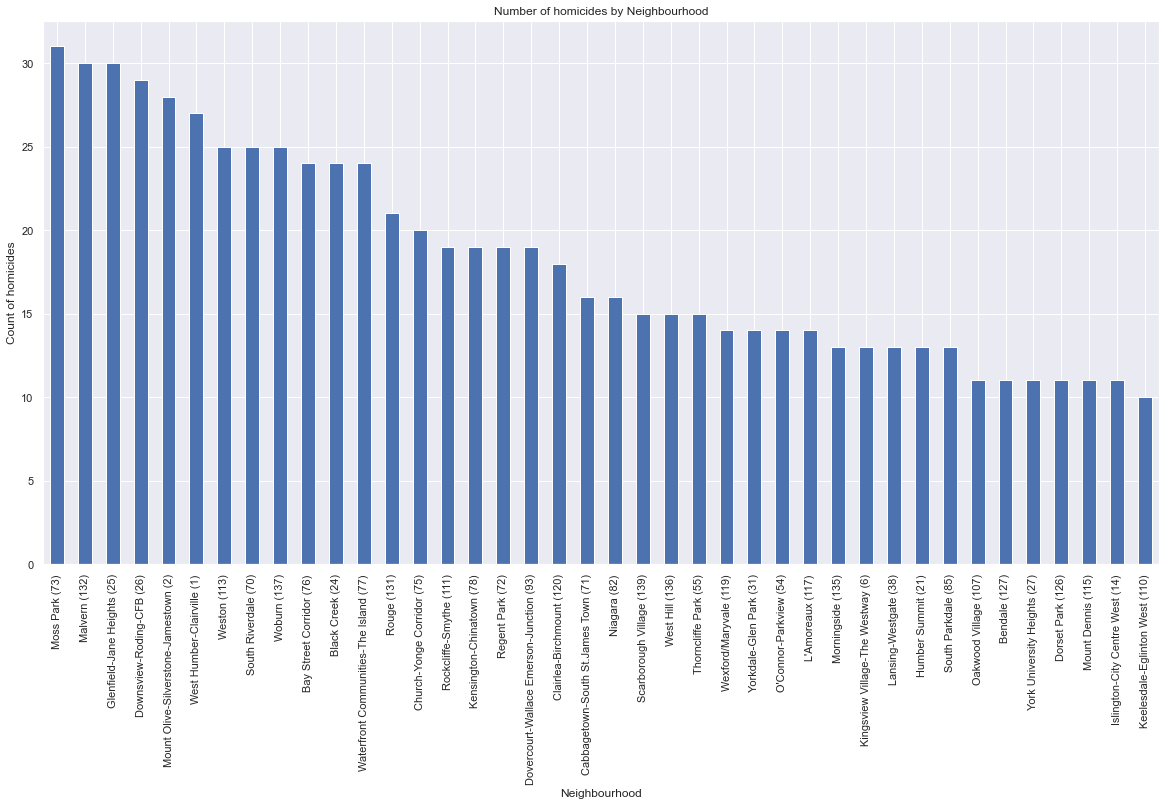

In [47]:
df_homicides_1.Neighbourhood.value_counts().nlargest(40).plot(kind='bar', figsize=(20,10))
plt.title("Number of homicides by Neighbourhood")
plt.ylabel('Count of homicides')
plt.xlabel('Neighbourhood');

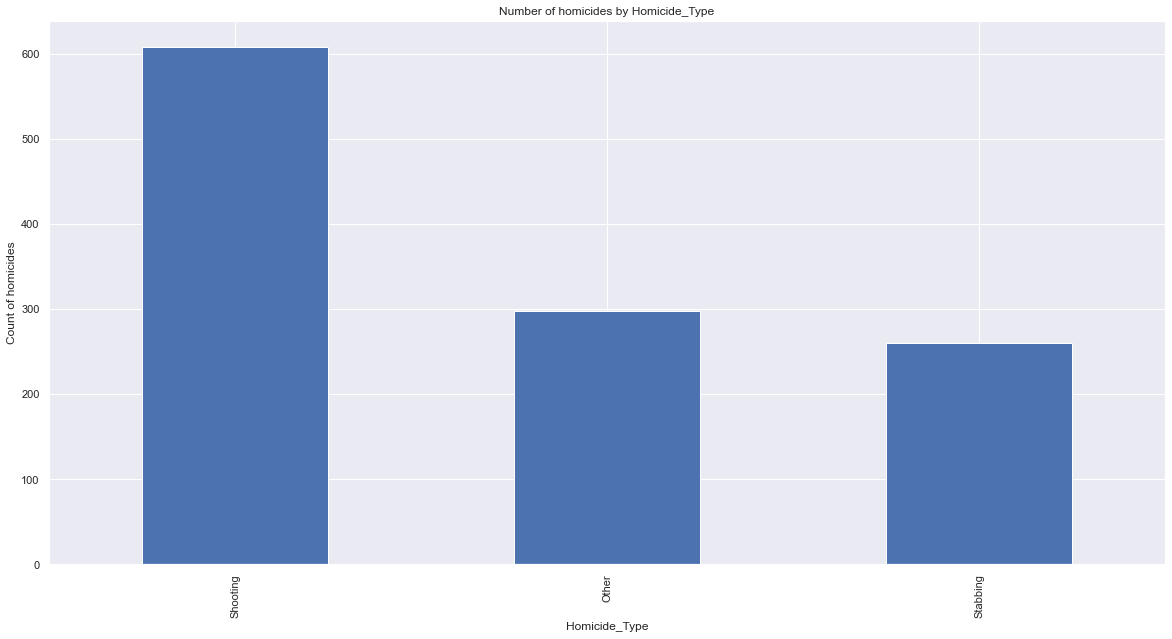

In [48]:
df_homicides_1.Homicide_Type.value_counts().nlargest(40).plot(kind='bar', figsize=(20,10))
plt.title("Number of homicides by Homicide_Type")
plt.ylabel('Count of homicides')
plt.xlabel('Homicide_Type');

## Reported Crime Visual EDA

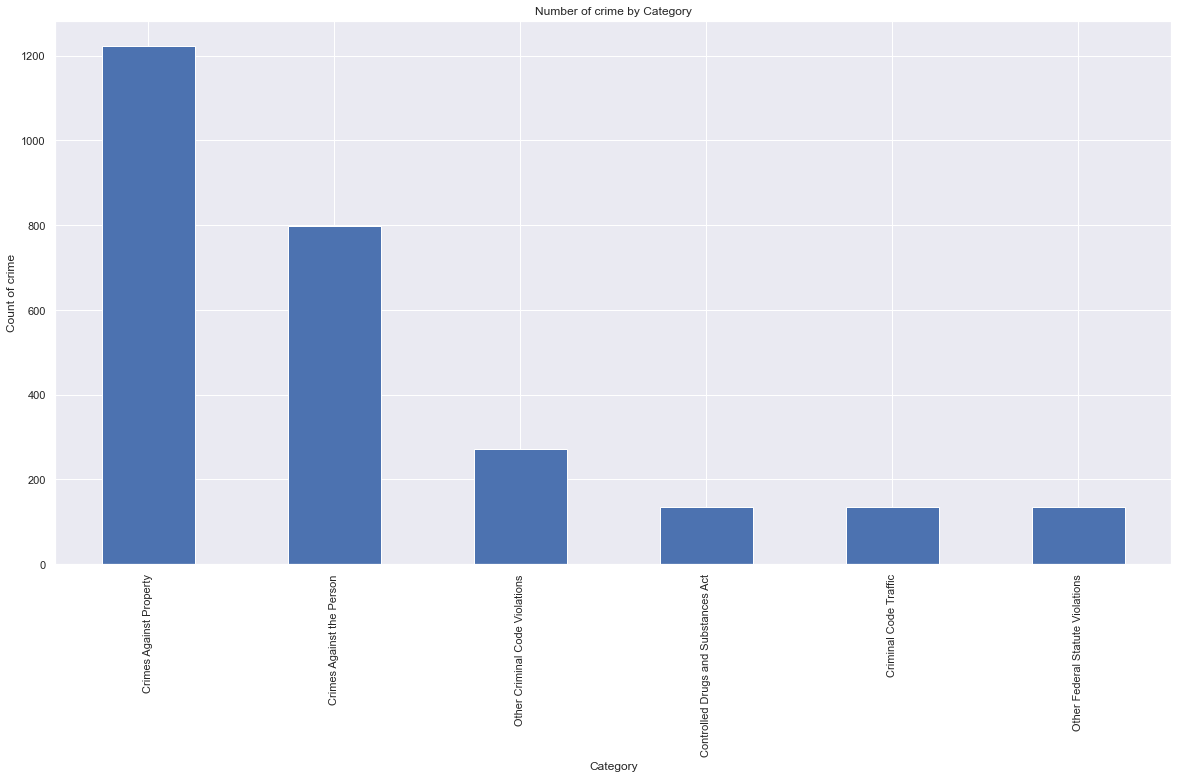

In [49]:
df_reported_crimes.Category.value_counts().nlargest(40).plot(kind='bar', figsize=(20,10))
plt.title("Number of crime by Category")
plt.ylabel('Count of crime')
plt.xlabel('Category');

## Victims of Crime Visual EDA

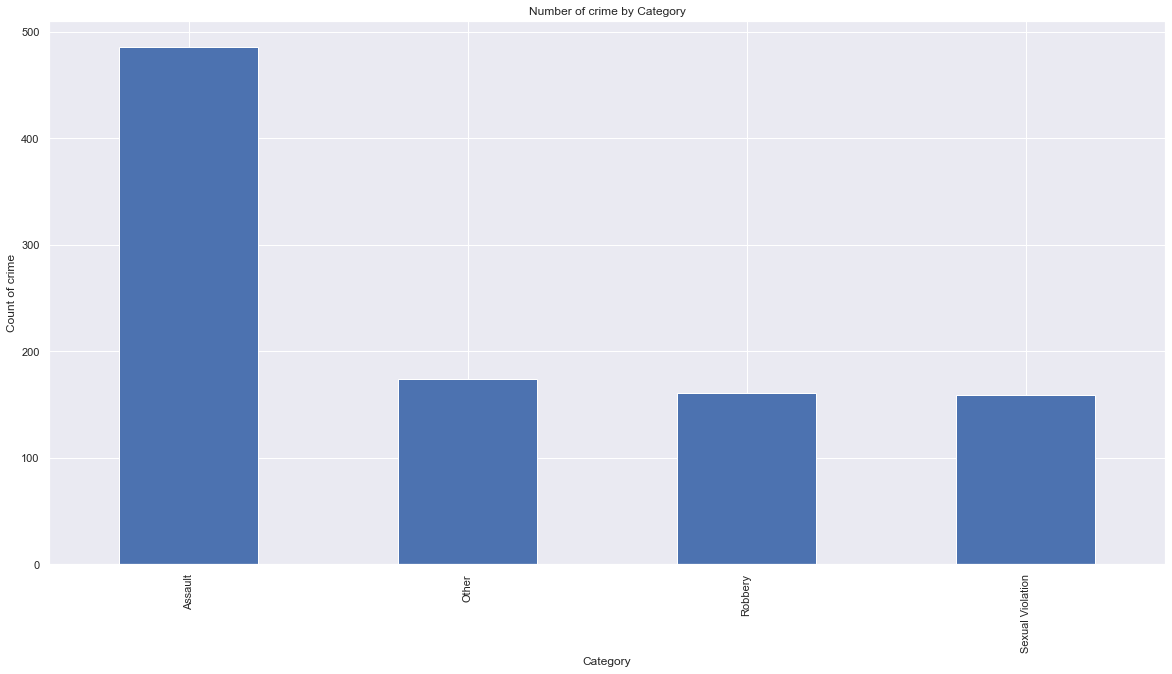

In [50]:
df_victims_of_crime.Subtype.value_counts().nlargest(40).plot(kind='bar', figsize=(20,10))
plt.title("Number of crime by Category")
plt.ylabel('Count of crime')
plt.xlabel('Category');

# Crime Datasets Summary

## Summary description of all Toronto crime datasets:

### Traffic Dataset 
* Size: 553,780 Rows  
* Data Types  
    _id                    int64  
    EventUniqueId         object  
    OccurrenceDate        object  
    Month                 object  
    Day_of_Week           object  
    Year                   int64  
    Hour                 float64  
    Division              object  
    Atom                  object  
    Neighbourhood         object  
    Fatalities           float64  
    Injury_Collisions     object  
    FTR_Collisions        object  
    PD_Collisions         object  
    geometry              object  
    
### Major Crime Dataset 
* Size: 301,233 Rows  
* Data Types  
    _id                      int64  
    event_unique_id         object  
    Division                object  
    occurrencedate          object  
    reporteddate            object  
    location_type           object  
    premises_type           object  
    ucr_code                 int64  
    ucr_ext                  int64  
    offence                 object  
    reportedyear             int64  
    reportedmonth           object  
    reportedday              int64  
    reporteddayofyear        int64  
    reporteddayofweek       object  
    reportedhour           float64  
    occurrenceyear         float64  
    occurrencemonth         object  
    occurrenceday          float64  
    occurrencedayofyear    float64  
    occurrencedayofweek     object  
    occurrencehour         float64  
    mci_category            object  
    Hood_ID                 object  
    Neighbourhood           object  

### Motor Vehicle Dataset

* Size: 17,488 Rows
* Data Types  

_id                    int64  
ACCNUM                 int64  
YEAR                   int64  
DATE                  object  
TIME                   int64  
STREET1               object  
STREET2               object  
OFFSET                object  
ROAD_CLASS            object  
DISTRICT              object  
WARDNUM              float64  
LOCCOORD              object  
ACCLOC                object  
TRAFFCTL              object  
VISIBILITY            object  
LIGHT                 object  
RDSFCOND              object 
ACCLASS               object  
IMPACTYPE             object  
INVTYPE               object  
INVAGE                object  
INJURY                object  
FATAL_NO              object  
INITDIR               object  
VEHTYPE               object  
MANOEUVER             object  
DRIVACT               object  
DRIVCOND              object  
PEDTYPE               object  
PEDACT                object  
PEDCOND               object  
CYCLISTYPE            object  
CYCACT                object  
CYCCOND               object  
PEDESTRIAN            object  
CYCLIST               object  
AUTOMOBILE            object  
MOTORCYCLE            object  
TRUCK                 object  
TRSN_CITY_VEH         object  
EMERG_VEH             object  
PASSENGER             object  
SPEEDING              object  
AG_DRIV               object  
REDLIGHT              object  
ALCOHOL               object  
DISABILITY            object  
HOOD_158              object  
NEIGHBOURHOOD_158     object  
HOOD_140              object  
NEIGHBOURHOOD_140     object  
DIVISION              object  
geometry              object  
     
### Neighborhood Crime
* Size: 147 Rows  
* Data Types 

_id                                 int64  
OBJECTID                            int64  
HoodName                           object  
HoodID                              int64  
F2021_Population_Projection         int64       
TheftfromMotorVehicle_Rate2018    float64  
TheftfromMotorVehicle_Rate2019    float64  
TheftfromMotorVehicle_Rate2020    float64  
TheftfromMotorVehicle_Rate2021    float64  
geometry    

### Homicides   
* Size: 1287 Rows  
* Data Types  

_id                 int64  
Event_Unique_Id    object  
Occurrence_year     int64  
Division           object  
Homicide_Type      object  
Occurrence_Date    object  
Hood_ID             int64  
Neighbourhood      object  
ObjectId            int64  
geometry           object  

### Reported Crime
* Size: 2702 Rows  
* Data Types  
  
_id              int64  
ObjectId         int64  
ReportedYear     int64  
GeoDivision     object  
Category        object  
Subtype         object  
Count_           int64  
CountCleared     int64  

### Victims of Crime  
* Size: 980 Rows  
* Data Types  

_id                int64  
ReportedYear       int64  
Category          object  
Subtype           object  
AssaultSubtype    object  
Sex               object  
AgeGroup          object  
AgeCohort         object  
Count_             int64  

###  Key numercial features 


# EDA Summary

I researched the city of Toronto several datasets that we could possibly be used to generate a running route safety score. Here are the datasets:  

1.	Traffic Collisions: This dataset contains information on traffic accidents that occur in Toronto, including the location, date, and type of collision. High probability. 
2.	Major Crime Indicators: This dataset provides information on major crime indicators in Toronto, including the number of incidents, the type of crime, and the location. High probability.
3.	Motor Vehicle Collisions involving Killed or Seriously Injured Persons: This dataset provides information on motor vehicle collisions that result in death or serious injury, including the location, date, and number of fatalities or injuries. High probability.
4.	Neighborhood Crime Rates: This dataset provides information on crime rates for each neighborhood in Toronto, including the type of crime, number of incidents, and the rate per 100,000 population. Medium probability.
5.	Police Annual Statistical Report of Homicides: This dataset provides information on homicides that occur in Toronto, including the location, date, and number of fatalities. High probability.
6.	Police Annual Statistical Report of Reported Crimes: This dataset provides information on reported crimes in Toronto, including the type of crime, and number of incidents. Low Probability. 
7.	Police Annual Statistical Report of Victims of Crimes: This dataset provides information on victims of crimes in Toronto, including the victim demographics, type of crime, and number of victims. Low probability.  

Based on the datasets explored, it feels like a good approached to join all the datasets using latitude and longitude as the key. This approach will provide us a more precise and accurate location for each incident, allowing for a more detailed analysis of crime and safety patterns. By using latitude and longitude, we could map the incidents and to visualize the concentration of crime and accidents in different areas of the city.

Another approach could be, to join the datasets using neighborhoods as the key. This approach might provide a less precise but we could still research an analysis of crime and safety patterns. The neighborhoods could be used as a proxy to the geographical location for the crime analysis.


## Correlation EDA

### Feature selection

### Train/Test split

## Model

``Build model``

### Build and Train a Model